In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 20]

In [9]:
import radye as rye
import torchio as tio

#### Setup Paths

In [10]:
data_dir = rye.RYE_DATA
pretext = 'example_'

#### Check Paths

In [11]:
t1w_path = data_dir / f"{pretext}T1w.nii.gz"
t1c_path = data_dir / f"{pretext}T1c.nii.gz"
t2w_path = data_dir / f"{pretext}T2w.nii.gz"
flair_path = data_dir / f"{pretext}FLAIR.nii.gz"
print("Does T1w file exist? " + ("Yep." if t1w_path.is_file() else "Nope."))
print("Does T1c file exist? " + ("Yep." if t1c_path.is_file() else "Nope."))
print("Does T2w file exist? " + ("Yep." if t2w_path.is_file() else "Nope."))
print("Does FLAIR file exist? " + ("Yep." if flair_path.is_file() else "Nope."))

Does T1w file exist? Yep.
Does T1c file exist? Yep.
Does T2w file exist? Yep.
Does FLAIR file exist? Yep.


#### torchIO Subject

In [12]:
subject_dict = {
    'T1w': tio.ScalarImage(t1w_path),
    'T1c': tio.ScalarImage(t1c_path),
    'T2w': tio.ScalarImage(t2w_path),
    'FLAIR': tio.ScalarImage(flair_path),
}

subject = tio.Subject(subject_dict)

In [13]:
subject.get_images()

[ScalarImage(shape: (1, 256, 224, 26); spacing: (0.90, 0.90, 5.50); orientation: LAS+; path: "/home/dinize@acct.upmchs.net/playground/radye/data/example_T1w.nii.gz"),
 ScalarImage(shape: (1, 256, 224, 26); spacing: (0.90, 0.90, 5.50); orientation: LAS+; path: "/home/dinize@acct.upmchs.net/playground/radye/data/example_T1c.nii.gz"),
 ScalarImage(shape: (1, 224, 256, 26); spacing: (0.90, 0.90, 5.50); orientation: LAS+; path: "/home/dinize@acct.upmchs.net/playground/radye/data/example_T2w.nii.gz"),
 ScalarImage(shape: (1, 208, 256, 26); spacing: (0.90, 0.90, 5.50); orientation: LAS+; path: "/home/dinize@acct.upmchs.net/playground/radye/data/example_FLAIR.nii.gz")]

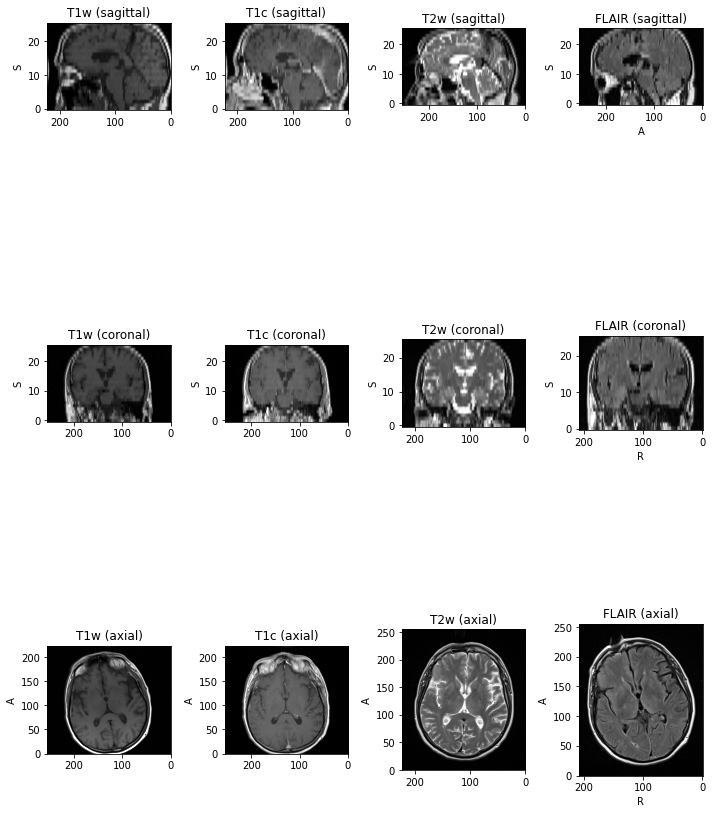

In [17]:
subject.plot()

#### Preprocessing

In [19]:
subject_paths = {
    'T1w': t1w_path,
    'T1c': t1c_path,
    'T2w': t2w_path,
    'FLAIR': flair_path,
}
pproc = rye.Preprocessor(
    subject_paths,
    output_folder=rye.RYE_OUT,
    reference="T1w",
    do_skull_stripping=True,
    do_coregistration=True,
    to_mni=True,
    crop=True,
)

pproc.run()

MNI template not found. Using the ICBM2009C Template
[INFO] Registering to MNI space using ANTsPy
T1w is used as reference
[INFO] Registration performed to MNI for T1c
[INFO] Registration performed to MNI for T2w
[INFO] Registration performed to MNI for FLAIR
[INFO] Performing Skull Stripping using HD-BET
File: /home/dinize@acct.upmchs.net/playground/radye/output/coregistration/T1w.nii.gz
preprocessing...
image shape after preprocessing:  (129, 153, 129)
prediction (CNN id)...
0
1
2
3
4
exporting segmentation...
[INFO] Performing Cropping


#### torchIO Preprocessed Subject

In [31]:
out_dir = rye.RYE_OUT
subdirs = ["coregistration", "skullstripping", "cropping"]
subdir_idx = 2
pproc_t1w_path = out_dir / subdirs[subdir_idx] / "T1w.nii.gz"
pproc_t1c_path = out_dir / subdirs[subdir_idx] / "T1c.nii.gz"
pproc_t2w_path = out_dir / subdirs[subdir_idx] / "T2w.nii.gz"
pproc_flair_path = out_dir / subdirs[subdir_idx] / "FLAIR.nii.gz"

pproc_subject_dict = {
    'T1w': tio.ScalarImage(pproc_t1w_path),
    'T1c': tio.ScalarImage(pproc_t1c_path),
    'T2w': tio.ScalarImage(pproc_t2w_path),
    'FLAIR': tio.ScalarImage(pproc_flair_path),
}

pproc_subject = tio.Subject(pproc_subject_dict)

In [32]:
pproc_subject.get_images()

[ScalarImage(shape: (1, 126, 156, 136); spacing: (1.00, 1.00, 1.00); orientation: RAS+; path: "/home/dinize@acct.upmchs.net/playground/radye/output/cropping/T1w.nii.gz"),
 ScalarImage(shape: (1, 126, 156, 136); spacing: (1.00, 1.00, 1.00); orientation: RAS+; path: "/home/dinize@acct.upmchs.net/playground/radye/output/cropping/T1c.nii.gz"),
 ScalarImage(shape: (1, 126, 156, 136); spacing: (1.00, 1.00, 1.00); orientation: RAS+; path: "/home/dinize@acct.upmchs.net/playground/radye/output/cropping/T2w.nii.gz"),
 ScalarImage(shape: (1, 126, 156, 136); spacing: (1.00, 1.00, 1.00); orientation: RAS+; path: "/home/dinize@acct.upmchs.net/playground/radye/output/cropping/FLAIR.nii.gz")]

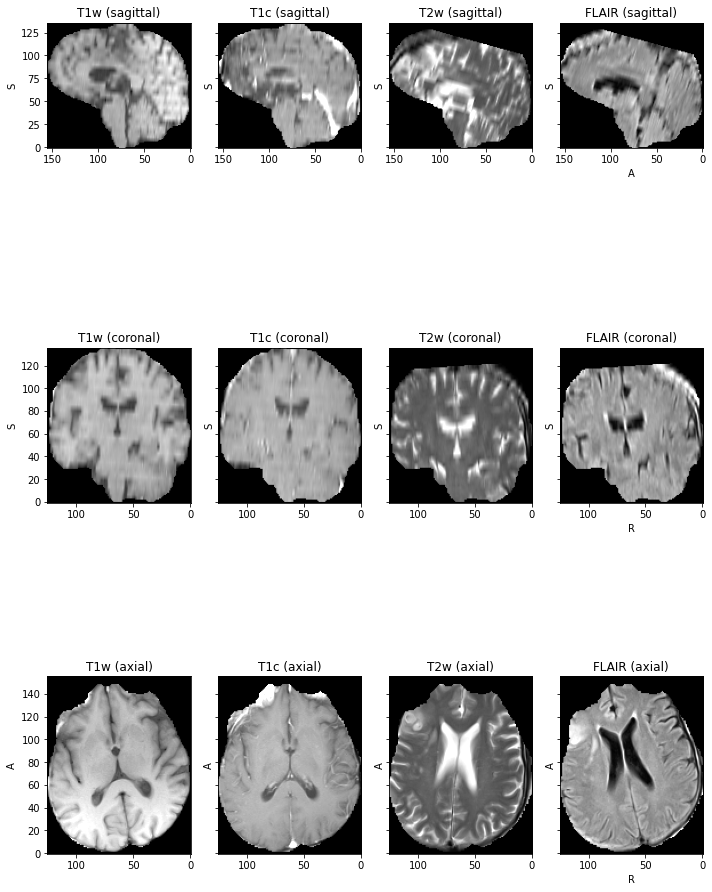

In [33]:
pproc_subject.plot()